#📌 Extracão

###### Imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
dados = pd.read_json('/content/TelecomX_Data.json')
dados_completos = dados.drop(['customer','phone','internet','account'], axis=1)
dados_completos[['Churn']] = dados_completos[['Churn']].applymap(lambda x: False if x == 'No' else True)
dados_completos.head()

<ipython-input-45-61fbfbd4bb7f>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dados_completos[['Churn']] = dados_completos[['Churn']].applymap(lambda x: False if x == 'No' else True)


,customerID,Churn
0,0002-ORFBO,False
1,0003-MKNFE,False
2,0004-TLHLJ,True
3,0011-IGKFF,True
4,0013-EXCHZ,True


#🔧 Transformação

In [46]:
df_normalizado_customer = pd.json_normalize(dados['customer'])
df_normalizado_phone = pd.json_normalize(dados['phone'])
df_normalizado_internet = pd.json_normalize(dados['internet'])
df_normalizado_account = pd.json_normalize(dados['account'])

In [47]:
df_normalizado_customer[['SeniorCitizen']] = df_normalizado_customer[['SeniorCitizen']].astype(bool)
df_normalizado_customer[['Partner', 'Dependents']] = df_normalizado_customer[['Partner', 'Dependents']].applymap(lambda x: False if x == 'No' else True)

df_normalizado_customer.info()
df_normalizado_customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   bool  
 2   Partner        7267 non-null   bool  
 3   Dependents     7267 non-null   bool  
 4   tenure         7267 non-null   int64 
dtypes: bool(3), int64(1), object(1)
memory usage: 135.0+ KB


<ipython-input-47-ba359b8df109>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalizado_customer[['Partner', 'Dependents']] = df_normalizado_customer[['Partner', 'Dependents']].applymap(lambda x: False if x == 'No' else True)


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,False,True,True,9
1,Male,False,False,False,9
2,Male,False,False,False,4
3,Male,True,True,False,13
4,Female,True,True,False,3
...,...,...,...,...,...
7262,Female,False,False,False,13
7263,Male,False,True,False,22
7264,Male,False,False,False,2
7265,Male,False,True,True,67


In [48]:
df_normalizado_phone[['PhoneService', 'MultipleLines']] = df_normalizado_phone[['PhoneService', 'MultipleLines']].applymap(lambda x: False if x == 'No' else True)

df_normalizado_phone.info()
df_normalizado_phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7267 non-null   bool 
 1   MultipleLines  7267 non-null   bool 
dtypes: bool(2)
memory usage: 14.3 KB


<ipython-input-48-2567fe99abd5>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalizado_phone[['PhoneService', 'MultipleLines']] = df_normalizado_phone[['PhoneService', 'MultipleLines']].applymap(lambda x: False if x == 'No' else True)


,PhoneService,MultipleLines
0,True,False
1,True,True
2,True,False
3,True,False
4,True,False


In [49]:
df_normalizado_internet[['InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']] = df_normalizado_internet[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].applymap(lambda x: False if x == 'No' else True)

df_normalizado_internet.info()
df_normalizado_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   InternetService   7267 non-null   bool 
 1   OnlineSecurity    7267 non-null   bool 
 2   OnlineBackup      7267 non-null   bool 
 3   DeviceProtection  7267 non-null   bool 
 4   TechSupport       7267 non-null   bool 
 5   StreamingTV       7267 non-null   bool 
 6   StreamingMovies   7267 non-null   bool 
dtypes: bool(7)
memory usage: 49.8 KB


<ipython-input-49-e259e492148d>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalizado_internet[['InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']] = df_normalizado_internet[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].applymap(lambda x: False if x == 'No' else True)


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,True,False,True,False,True,True,False
1,True,False,False,False,False,False,True
2,True,False,False,True,False,False,False
3,True,False,True,True,False,True,True
4,True,False,False,False,True,True,False


In [50]:
df_normalizado_account[['PaperlessBilling']] = df_normalizado_account[['PaperlessBilling']].applymap(lambda x: False if x == 'No' else True)
df_normalizado_account['Charges.Total'] = df_normalizado_account['Charges.Total'].replace(' ', np.nan).astype(np.float64)


df_normalizado_account.info()
df_normalizado_account

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), object(2)
memory usage: 234.3+ KB


<ipython-input-50-6331ac0c87c9>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalizado_account[['PaperlessBilling']] = df_normalizado_account[['PaperlessBilling']].applymap(lambda x: False if x == 'No' else True)


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,True,Mailed check,65.60,593.30
1,Month-to-month,False,Mailed check,59.90,542.40
2,Month-to-month,True,Electronic check,73.90,280.85
3,Month-to-month,True,Electronic check,98.00,1237.85
4,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...
7262,One year,False,Mailed check,55.15,742.90
7263,Month-to-month,True,Electronic check,85.10,1873.70
7264,Month-to-month,True,Mailed check,50.30,92.75
7265,Two year,False,Mailed check,67.85,4627.65


Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilize o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.


In [51]:
dados_completos['Contas_Diarias'] = df_normalizado_account['Charges.Monthly'] / 30
dados_completos['Contas_Diarias']

,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [52]:
dados_completos['gender'] = df_normalizado_customer['gender']
dados_completos['SeniorCitizen'] = df_normalizado_customer['SeniorCitizen']
dados_completos['Partner'] = df_normalizado_customer['Partner']
dados_completos['Dependents'] = df_normalizado_customer['Dependents']
dados_completos['tenure'] = df_normalizado_customer['tenure']

In [53]:
dados_completos['PhoneService'] = df_normalizado_phone['PhoneService']
dados_completos['MultipleLines'] = df_normalizado_phone['MultipleLines']
dados_completos

,customerID,Churn,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,False,2.186667,Female,False,True,True,9,True,False
1,0003-MKNFE,False,1.996667,Male,False,False,False,9,True,True
2,0004-TLHLJ,True,2.463333,Male,False,False,False,4,True,False
3,0011-IGKFF,True,3.266667,Male,True,True,False,13,True,False
4,0013-EXCHZ,True,2.796667,Female,True,True,False,3,True,False
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,1.838333,Female,False,False,False,13,True,False
7263,9992-RRAMN,True,2.836667,Male,False,True,False,22,True,True
7264,9992-UJOEL,False,1.676667,Male,False,False,False,2,True,False
7265,9993-LHIEB,False,2.261667,Male,False,True,True,67,True,False


In [54]:
dados_completos['InternetService'] = df_normalizado_internet['InternetService']
dados_completos['OnlineSecurity'] = df_normalizado_internet['OnlineSecurity']
dados_completos['OnlineBackup'] = df_normalizado_internet['OnlineBackup']
dados_completos['DeviceProtection'] = df_normalizado_internet['DeviceProtection']
dados_completos['TechSupport'] = df_normalizado_internet['TechSupport']
dados_completos['StreamingTV'] = df_normalizado_internet['StreamingTV']
dados_completos['StreamingMovies'] = df_normalizado_internet['StreamingMovies']
dados_completos

,customerID,Churn,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,False,2.186667,Female,False,True,True,9,True,False,True,False,True,False,True,True,False
1,0003-MKNFE,False,1.996667,Male,False,False,False,9,True,True,True,False,False,False,False,False,True
2,0004-TLHLJ,True,2.463333,Male,False,False,False,4,True,False,True,False,False,True,False,False,False
3,0011-IGKFF,True,3.266667,Male,True,True,False,13,True,False,True,False,True,True,False,True,True
4,0013-EXCHZ,True,2.796667,Female,True,True,False,3,True,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,1.838333,Female,False,False,False,13,True,False,True,True,False,False,True,False,False
7263,9992-RRAMN,True,2.836667,Male,False,True,False,22,True,True,True,False,False,False,False,False,True
7264,9992-UJOEL,False,1.676667,Male,False,False,False,2,True,False,True,False,True,False,False,False,False
7265,9993-LHIEB,False,2.261667,Male,False,True,True,67,True,False,True,True,False,True,True,False,True


In [55]:
dados_completos['Contract'] = df_normalizado_account['Contract']
dados_completos['PaperlessBilling'] = df_normalizado_account['PaperlessBilling']
dados_completos['PaymentMethod'] = df_normalizado_account['PaymentMethod']
dados_completos['Charges.Monthly'] = df_normalizado_account['Charges.Monthly']
dados_completos['Charges.Total'] = df_normalizado_account['Charges.Total']
dados_completos

,customerID,Churn,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,2.186667,Female,False,True,True,9,True,False,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,1.996667,Male,False,False,False,9,True,True,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,2.463333,Male,False,False,False,4,True,False,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,3.266667,Male,True,True,False,13,True,False,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,2.796667,Female,True,True,False,3,True,False,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,1.838333,Female,False,False,False,13,True,False,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,True,2.836667,Male,False,True,False,22,True,True,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,False,1.676667,Male,False,False,False,2,True,False,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,False,2.261667,Male,False,True,True,67,True,False,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


#📊 Carga e análise

Realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [56]:
df_normalizado_customer.groupby('gender').mean(numeric_only=True)

,SeniorCitizen,Partner,Dependents,tenure
gender,,,,
Female,0.164254,0.486637,0.294543,32.203229
Male,0.161088,0.481633,0.305578,32.486531


In [57]:
df_normalizado_customer['tenure'].median()

29.0

In [58]:
df_normalizado_customer['tenure'].std()

24.571772888767292

In [59]:
df_normalizado_phone.groupby('PhoneService').mean(numeric_only=True)

,MultipleLines
PhoneService,
False,1.000000
True,0.467226


In [60]:
df_normalizado_internet.groupby('InternetService').mean(numeric_only=True)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
InternetService,,,,,,
False,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
True,0.365459,0.44038,0.438094,0.370032,0.490679,0.495251


In [61]:
df_normalizado_account.groupby('Contract').mean(numeric_only=True)

,PaperlessBilling,Charges.Monthly,Charges.Total
Contract,,,
Month-to-month,0.667665,66.344594,1366.738951
One year,0.545095,65.233344,3052.632905
Two year,0.464142,60.540103,3716.442931


In [62]:
df_normalizado_account['Charges.Monthly'].median()

70.3

In [63]:
df_normalizado_account['Charges.Monthly'].std()

30.12957188566699

In [64]:
df_normalizado_account['Charges.Total'].median()

1391.0

In [65]:
df_normalizado_account['Charges.Total'].std()

2268.6329969266067

In [66]:
dados_completos.groupby('Churn').mean(numeric_only=True)

,Contas_Diarias,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
Churn,,,,,,,,,,,,,,,,,
False,2.042171,0.128721,0.528218,0.344801,37.569965,0.901044,0.508891,0.726904,0.606301,0.641477,0.635872,0.608233,0.638964,0.643023,0.535562,61.265124,2555.344141
True,2.442032,0.246536,0.375060,0.189680,19.433827,0.906832,0.544195,0.919732,0.249403,0.365982,0.373626,0.257047,0.508839,0.511228,0.735786,73.260965,1602.981390


In [67]:
dados_completos['Contas_Diarias'].median()

2.3433333333333333

In [68]:
dados_completos['Contas_Diarias'].std()

1.0043190628555607

#### Gráficos

In [83]:
churnCount = dados_completos['Churn'].value_counts()
churnCount

,count
Churn,
False,5174
True,2093


<ipython-input-85-553f3d6300a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


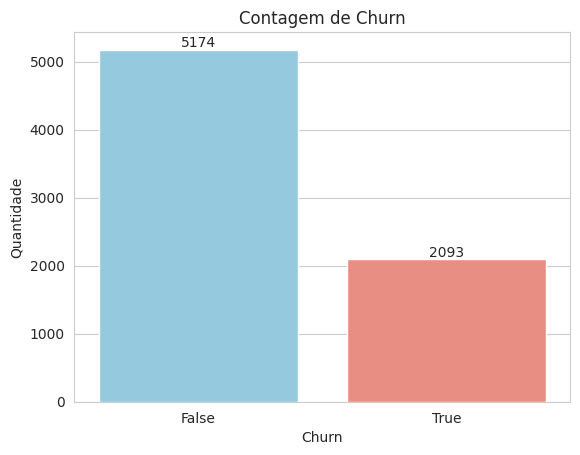

In [85]:
# Converter para DataFrame (ideal para Seaborn)
df_plot = churnCount.reset_index()
df_plot.columns = ['Churn', 'Contagem']  # Renomear colunas

# Plotar com Seaborn
sns.barplot(
    data=df_plot,
    x='Churn',
    y='Contagem',
    palette=['skyblue', 'salmon']  # Cores personalizadas
)

# Adicionar título e rótulos
plt.title('Contagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')

# Mostrar valores em cima das barras
for index, row in df_plot.iterrows():
    plt.text(index, row['Contagem'], str(row['Contagem']), ha='center', va='bottom')

plt.show()

#📄Relatorio Final

O objetivo desta análise é entender o problema de evasão de clientes da TeleconX (A partir daqui será usado o termo "Churn" para se referir ao problema). Para realizar a análise tivemos acesso a um arquivo JSON com dados de 7267 clientes e informações impessoais sobre eles e seus planos com a empresa.


O primeiro passo foi limpar e tratar os dados, pois o arquivo JSON não estava normalizado. Separamos os dados que deviam ser normalizados em vários dataframes separados, para poder tratá-los separadamente, posteriormente realizar as análises necessárias e então adicioná-los ao dataframe principal onde juntamos todas as informações. O tratamento foi feito mudando o tipo de algumas das colunas para tipos que fossem mais fáceis de manipular posteriormente, como por exemplo, colunas com dados textuais binários ("Sim" ou "Não") para booleanos e colunas com valores monetários que estavam sendo representadas como texto.

Após o tratamento, foram feitas análises em cada um dos dataframes separados, tendo como base alguma coluna que pudesse representar algum possível comportamento padrão e buscando valores representativos, como médias, medianas e desvios padrão. Também foi feita uma análise no dataframe completo, usando a coluna "Churn" como eixo, já que ela só tem um valor binário.

Com base nas análises vemos que a quantidade de pessoas que pararam de adquirir o serviço da TelecomX é menos da metade dos clientes atuais da empresa. Comparando esses dados podemos ver que, em média, clientes que cancelaram o serviço tinham cobranças mais altas por mês. Também notamos que a quantidade média de clientes com mais de 65 anos é um pouco mais alta entre os ex-clientes. Além disso, a quantidade de clientes no churn que não tem um parceiro(a) nem dependentes no plano é significativamente mais alta.
Também nota-se que em média, pessoas que cancelam o plano tem menos tempo de assinatura, que em média, é significativamente mais baixo que a mediana total.
Outro dado interessante é que pessoas que cancelam o plano, não tinham em suas assinaturas, planos de suporte, como segurança online, backup, proteção de dispositivos e suporte técnico, além de também não incluírem planos de streaming.
E por último, também é fácil notar que pessoas que cancelaram seus planos costumavam receber a fatura online.

Com base nisso, podemos resumir os casos de evasão em 4 categorias:

1.   Pessoas que pagavam valores altos
2.   Pessoas idosas/sem dependentes
3.   Pessoas que não usavam serviços de suporte
4.   Pessoas que só recebiam a fatura online

A partir destas 4 categorias deve-se buscar soluções específicas para atrair cada um dos grupos, como por exemplo, planos mais baratos para o grupo 1, planos específicos para pessoas que não possuem outras pessoas inclusas no plano, melhor divulgação dos serviços de suporte, etc.